In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from matplotlib.axis import Axis

In [2]:
df = pd.read_csv('udemy_courses.csv')

### Casteando las columna published_timestamp de Object a Date

In [3]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [4]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

### Creando dos nuevas columnas published_Month y published_Year

In [5]:
df['published_Month'] = df['published_timestamp'].dt.month
df['published_Year'] = df['published_timestamp'].dt.year

In [6]:
df = df.drop(columns=['published_timestamp'])

### Analisis de valores nulos

In [7]:
result = pd.DataFrame()

In [8]:
for year_ in df.loc[ : , "published_Year" ].drop_duplicates():
    df_year = df.loc[ df['published_Year'] == year_ , : ]    
    for column_ in df_year.columns:        
        percentage =  np.sum(pd.isna( df_year.loc[ : , column_ ]  )) / df_year.shape[0]
        dfrow = pd.DataFrame({
            'year': [ year_ ]
            , 'column' : [ column_ ]
            , 'percentage.of.nans' : [ percentage ]
        })
        result = pd.concat([result, dfrow])

In [9]:
result

year            column  percentage.of.nans
0   2017         course_id                 0.0
0   2017      course_title                 0.0
0   2017               url                 0.0
0   2017           is_paid                 0.0
0   2017             price                 0.0
..   ...               ...                 ...
0   2011             level                 0.0
0   2011  content_duration                 0.0
0   2011           subject                 0.0
0   2011   published_Month                 0.0
0   2011    published_Year                 0.0

[91 rows x 3 columns]

In [10]:
df.isnull().sum()

course_id           0
course_title        0
url                 0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
published_Month     0
published_Year      0
dtype: int64

### Boxplots e Historigramas

#### Tamaño esperado de cada cuartil

In [11]:
3678/4

919.5

### Analizando la distribucion de datos para la columna price

{'whiskers': [<matplotlib.lines.Line2D at 0x1898c03daf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898c86b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898c031550>],
 'medians': [<matplotlib.lines.Line2D at 0x1898c86b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898c86bc40>],
 'means': []}

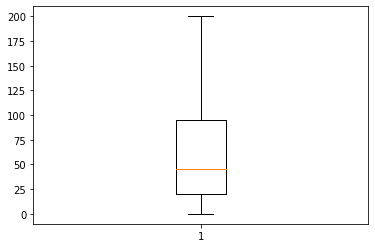

In [12]:
plt.boxplot(df["price"])

#### No se observan valores atipicos

<AxesSubplot:>

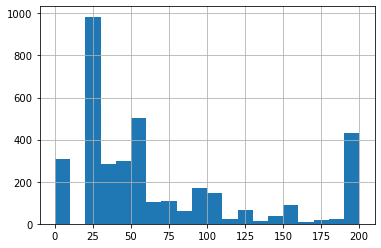

In [13]:
df["price"].hist(bins = 20)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de price

In [14]:
np.var(df.loc[0:919, "price"])

4373.78485349721

In [15]:
np.var(df.loc[920:1839, "price"])

3142.584002835529

In [16]:
np.var(df.loc[1840:2759, "price"])

3136.8364839319393

In [17]:
np.var(df.loc[2759:3678, "price"])

4058.4053727321125

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna num_subscribers

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [18]:
p90_num_subscribers = np.quantile(df["num_subscribers"], .90 )
p05_num_subscribers = np.quantile(df["num_subscribers"], .05 )

In [19]:
promedio_num_subscribers = np.mean(df["num_subscribers"])

In [20]:
promedio_num_subscribers = int(promedio_num_subscribers)

In [21]:
df.loc[ df["num_subscribers"] >= p90_num_subscribers , "num_subscribers" ] = promedio_num_subscribers
df.loc[ df["num_subscribers"] <= p05_num_subscribers , "num_subscribers" ] = promedio_num_subscribers

{'whiskers': [<matplotlib.lines.Line2D at 0x1898ca645e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898ca64d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898ca64250>],
 'medians': [<matplotlib.lines.Line2D at 0x1898ca6c460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898ca6c7f0>],
 'means': []}

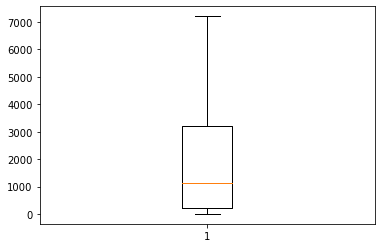

In [22]:
plt.boxplot(df["num_subscribers"])

#### No se observan valores atipicos

<AxesSubplot:>

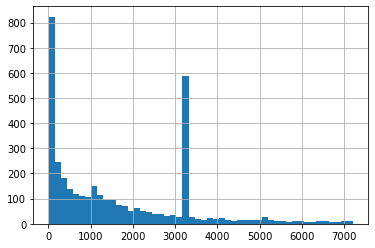

In [23]:
df["num_subscribers"].hist(bins = 50)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de num_subscribers

In [24]:
np.var(df.loc[0:919, "num_subscribers"])

2295657.038788989

In [25]:
np.var(df.loc[920:1839, "num_subscribers"])

2068556.5271632846

In [26]:
np.var(df.loc[1840:2759, "num_subscribers"])

2949328.550603741

In [27]:
np.var(df.loc[2759:3678, "num_subscribers"])

2622545.234965868

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna num_reviews

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [28]:
p90_num_reviews = np.quantile(df["num_reviews"], .90 )
p05_num_reviews = np.quantile(df["num_reviews"], .05 )

In [29]:
promedio_num_reviews = np.mean(df["num_reviews"])

In [30]:
promedio_num_reviews = int(promedio_num_reviews)

In [31]:
df.loc[ df["num_reviews"] >= p90_num_reviews , "num_reviews" ] = promedio_num_reviews
df.loc[ df["num_reviews"] <= p05_num_reviews , "num_reviews" ] = promedio_num_reviews

{'whiskers': [<matplotlib.lines.Line2D at 0x1898cbba790>,
 'caps': [<matplotlib.lines.Line2D at 0x1898cbbaeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898cbba520>],
 'medians': [<matplotlib.lines.Line2D at 0x1898cbc6610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898cbc69a0>],
 'means': []}

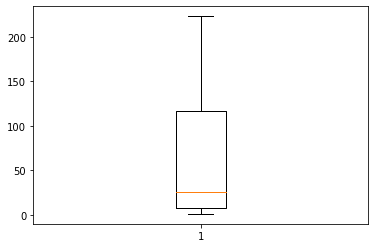

In [32]:
plt.boxplot(df["num_reviews"])

#### No se observan valores atipicos

<AxesSubplot:>

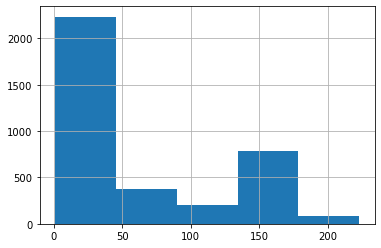

In [33]:
df["num_reviews"].hist(bins = 5)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de num_reviews

In [34]:
np.var(df.loc[0:919, "num_reviews"])

3375.5909629017224

In [35]:
np.var(df.loc[920:1839, "num_reviews"])

3675.329148156896

In [36]:
np.var(df.loc[1840:2759, "num_reviews"])

4687.62211720227

In [37]:
np.var(df.loc[2759:3678, "num_reviews"])

3512.8199928720464

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna num_lectures

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [38]:
p87_num_lectures = np.quantile(df["num_lectures"], .87 )
p05_num_lectures = np.quantile(df["num_lectures"], .05 )

In [39]:
promedio_num_lectures = np.mean(df["num_lectures"])

In [40]:
promedio_num_lectures = int(promedio_num_lectures)

In [41]:
df.loc[ df["num_lectures"] >= p87_num_lectures , "num_lectures" ] = promedio_num_lectures
df.loc[ df["num_lectures"] <= p05_num_lectures , "num_lectures" ] = promedio_num_lectures

{'whiskers': [<matplotlib.lines.Line2D at 0x1898dc658b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898dc65fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898dc65520>],
 'medians': [<matplotlib.lines.Line2D at 0x1898dc75730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898dc75ac0>],
 'means': []}

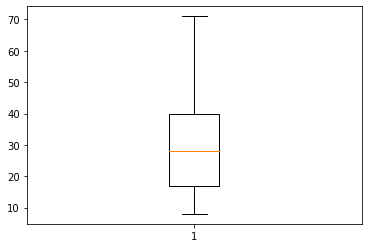

In [42]:
plt.boxplot(df["num_lectures"])

#### No se observan valores atipicos

<AxesSubplot:>

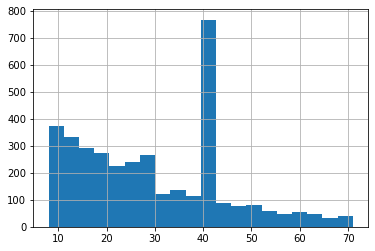

In [43]:
df["num_lectures"].hist(bins = 20)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de num_lectures

In [44]:
np.var(df.loc[0:919, "num_lectures"])

205.9739024102082

In [45]:
np.var(df.loc[920:1839, "num_lectures"])

202.10472471644547

In [46]:
np.var(df.loc[1840:2759, "num_lectures"])

225.7503768903583

In [47]:
np.var(df.loc[2759:3678, "num_lectures"])

219.65140232617918

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna content_duration

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [48]:
p89_content_duration = np.quantile(df["content_duration"], .89 )
p05_content_duration = np.quantile(df["content_duration"], .05 )

In [49]:
promedio_content_duration = np.mean(df["content_duration"])

In [50]:
promedio_num_lectures = int(promedio_num_lectures)

In [51]:
df.loc[ df["content_duration"] >= p89_content_duration , "content_duration" ] = promedio_content_duration
df.loc[ df["content_duration"] <= p05_content_duration , "content_duration" ] = promedio_content_duration

{'whiskers': [<matplotlib.lines.Line2D at 0x1898dd6b970>,
 'caps': [<matplotlib.lines.Line2D at 0x1898dd6bf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898dd6b5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1898dd796d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898dd79a60>],
 'means': []}

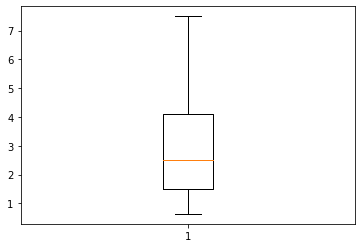

In [52]:
plt.boxplot(df["content_duration"])

#### No se observan valores atipicos

<AxesSubplot:>

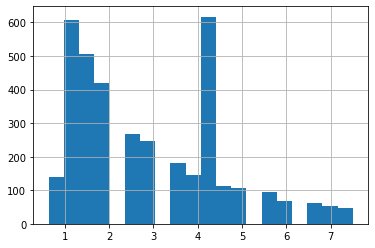

In [53]:
df["content_duration"].hist(bins = 20)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.
##### El histograma esta mas a la izquierda

#### Varianza de content_duration

In [54]:
np.var(df.loc[0:919, "content_duration"])

2.595166735026479

In [55]:
np.var(df.loc[920:1839, "content_duration"])

2.7873666144512685

In [56]:
np.var(df.loc[1840:2759, "content_duration"])

2.6423006943580365

In [57]:
np.var(df.loc[2759:3678, "content_duration"])

2.830031515215618

##### En el boxplot no se ve igualmente distribuidos los cuartiles
##### El historigrama no se ve con forma rectangular
##### Si hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna published_Month

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

{'whiskers': [<matplotlib.lines.Line2D at 0x1898de69ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898de74400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898de69910>],
 'medians': [<matplotlib.lines.Line2D at 0x1898de74b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898de74eb0>],
 'means': []}

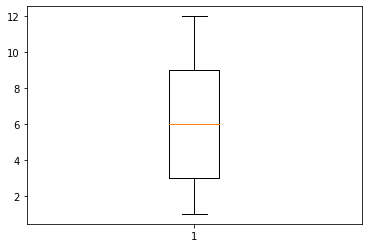

In [58]:
plt.boxplot(df["published_Month"])

#### No se observan valores atipicos

<AxesSubplot:>

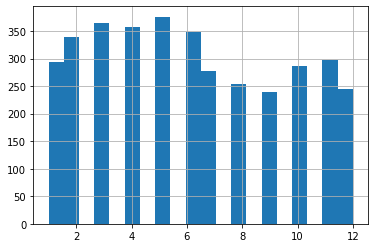

In [59]:
df["published_Month"].hist(bins = 20)

##### Los datos se comportan de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor.

#### Varianza de published_Month

In [60]:
np.var(df.loc[0:919, "published_Month"])

11.545198487712678

In [61]:
np.var(df.loc[920:1839, "published_Month"])

10.869560491493383

In [62]:
np.var(df.loc[1840:2759, "published_Month"])

11.203095463138018

In [63]:
np.var(df.loc[2759:3678, "published_Month"])

11.959467699787101

##### En el boxplot se ven igualmente distribuidos los cuartiles
##### El historigrama se ve con forma rectangular
##### No hace sentido tomarla como una variable numerica continua

### Analizando la distribucion de datos para la columna 

#### Limpieza de datos (Reemplazos de datos por medias o medianas)

In [64]:
p90_published_Year = np.quantile(df["published_Year"], .90 )
p05_published_Year = np.quantile(df["published_Year"], .05 )

In [65]:
promedio_published_Year = np.mean(df["published_Year"])

In [66]:
promedio_published_Year = int(promedio_published_Year)

In [67]:
df.loc[ df["published_Year"] >= p90_published_Year , "published_Year" ] = promedio_published_Year
df.loc[ df["published_Year"] <= p05_published_Year , "published_Year" ] = promedio_published_Year

{'whiskers': [<matplotlib.lines.Line2D at 0x1898df67fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898df75730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898df67c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1898df75e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898df81220>],
 'means': []}

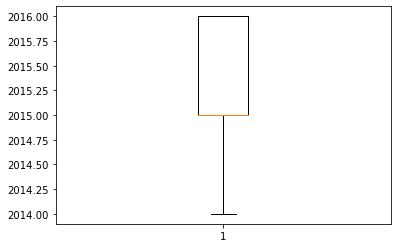

In [68]:
plt.boxplot(df["published_Year"])

#### Se observan valores atipicos

<AxesSubplot:>

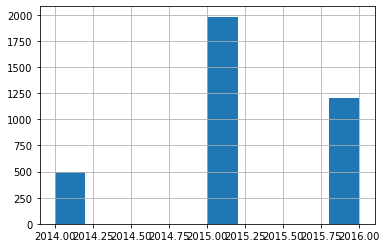

In [69]:
df["published_Year"].hist(bins = 10)

##### La distribucion en cada uno de los cuartiles probablemente no tiene la misma varianza, si fuera parecida los datos se comportarian de manera rectangular.
##### En el pico se concentra el mayor volumen de informacion y esta tiene el mismo valor
##### El histograma esta mas a la derecha

#### Varianza de published_Year

In [70]:
np.var(df.loc[0:919, "published_Year"])

0.42806710775046514

In [71]:
np.var(df.loc[920:1839, "published_Year"])

0.40168241965972984

In [72]:
np.var(df.loc[1840:2759, "published_Year"])

0.4685775047259039

In [73]:
np.var(df.loc[2759:3678, "published_Year"])

0.3860135620754448

##### En el boxplot se ven igualmente distribuidos los cuartiles
##### El historigrama se ve con forma rectangular
##### No hace sentido tomarla como una variable numerica continua

### Correlaciones

In [74]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'subject', 'published_Month', 'published_Year'],
      dtype='object')

In [75]:
columns_to_use = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

#### Correlacion de Pearson

In [76]:
corr_use = df.loc[:, columns_to_use].corr()

In [77]:
corr_use

price  num_subscribers  num_reviews  num_lectures  \
price             1.000000         0.081996     0.083333      0.252541   
num_subscribers   0.081996         1.000000     0.509217      0.032859   
num_reviews       0.083333         0.509217     1.000000      0.135604   
num_lectures      0.252541         0.032859     0.135604      1.000000   
content_duration  0.222753         0.031897     0.167351      0.565197   

                  content_duration  
price                     0.222753  
num_subscribers           0.031897  
num_reviews               0.167351  
num_lectures              0.565197  
content_duration          1.000000

##### Obs: La definicion de multicolinealidad dice que hay dos variables que son en extremo correlacionadas (Correlacion igual a uno). Pudiendo borrar una variable sin afectacion

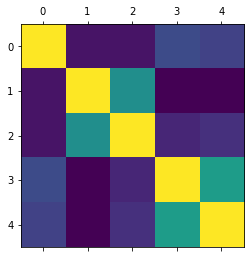

In [78]:
plt.matshow( corr_use )

C:\Users\chuii\AppData\Local\Temp/ipykernel_58096/2164071842.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap( corr_use, mask = np.zeros_like(corr_use, dtype = np.bool ), cmap = sns.diverging_palette(220, 10, as_cmap=True ), square = True , ax = ax)


<AxesSubplot:>

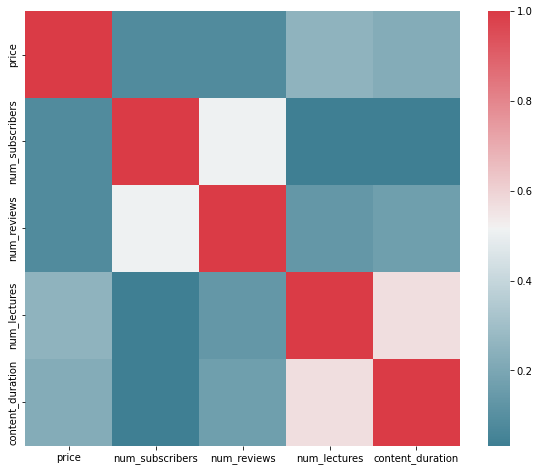

In [79]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap( corr_use, mask = np.zeros_like(corr_use, dtype = np.bool ), cmap = sns.diverging_palette(220, 10, as_cmap=True ), square = True , ax = ax)

##### Creando un objeto tipo grafico y de ejes

##### Como conclusion se puede decir que la columna conten_duration y num_lectures tienen una alta correlacion
##### No hay una correlacion muy marcada
##### Se puede decir que la columna num_suscribers y num_reviews tienen una correlacion media
##### Se puede decir que la columna price tienen una correlacion baja contra todas las variables

### Grafico Scatter para ver la correlacion entre dos columnas

#### Para la columna num_subscribers y num_reviews

 ###### Obs. Emula una funcion matematica

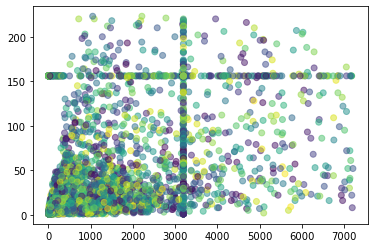

In [80]:
N = 3678
x_scatter_num_subscribers = df["num_subscribers"]
y_scatter_num_reviews = df["num_reviews"]
colors = np.random.rand(N)
## area = (30 * np.random.rand(N))**2

plt.scatter(x_scatter_num_subscribers, y_scatter_num_reviews, c = colors, alpha = 0.5)
plt.show()

##### Se ve dispersa
##### No se puede sacar ninguna conclusion

#### Grafico Scatter para la columna num_lectures y content_duration

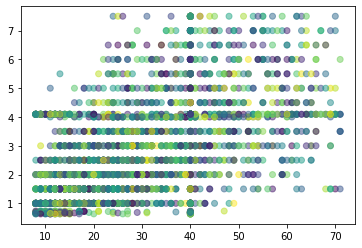

In [81]:
x_scatter_num_lectures = df["num_lectures"]
y_scatter_content_duration = df["content_duration"]
colors = np.random.rand(N)
## area = (30 * np.random.rand(N))**2

plt.scatter(x_scatter_num_lectures, y_scatter_content_duration, c = colors, alpha = 0.5)
plt.show()

##### Se ve dispersa 
##### No se puede sacar ninguna conclusion

### Principal Components Analysis (PCA)

##### Obs. Se refiere a la reduccion de dimensiones
##### Es un analisis no supervisado porque no hay etiquetas

In [82]:
columns_to_use = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

In [83]:
x = df.loc[:, columns_to_use].values

##### Idenficando las variables numericas

In [84]:
StandardScaler().fit_transform(x)

array([[ 2.19600149,  0.31081219, -0.56564013,  1.44938575, -0.82720228],
       [ 0.14673589,  0.70698857,  1.55750254,  0.70453337,  0.73615699],
       [-0.34508786,  0.32739632,  0.24849728,  1.44938575, -0.22463953],
       ...,
       [-0.42705848, -0.69283463,  1.76502777,  1.24624419,  0.37792323],
       [-0.26311723, -0.82366497, -0.4379323 ,  0.56910566,  0.07664185],
       [-0.34508786, -0.45451458, -0.35811491, -0.64974369, -0.5259209 ]])

##### Esta estandarizacion ayuda al momento de hacer las matrices de covarianza

In [85]:
pca = PCA( n_components = 2 )

##### Empezamos a trabajar con matrices de covarianza
##### Tranformando de 10 columnas a 2 para visualizarlo de forma clara

In [86]:
principalComponents = pca.fit_transform(x)

In [87]:
pcadf = pd.DataFrame(data = principalComponents, columns=["c1", "c2"])

In [88]:
def print_scatter(df, x_label, y_label):
    N = 3678
    x = df[x_label]
    y = df[y_label]
    colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

    plt.scatter(x, y, c=colors, alpha=0.5)
    plt.show()

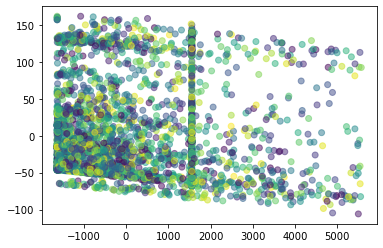

In [89]:
print_scatter(pcadf, "c1", "c2")

##### Se ve dispersa la informacion

### Clusters

In [90]:
pcadf = pd.DataFrame(data = principalComponents, columns=["c1", "c2"])

In [91]:
kmeans = KMeans( n_clusters=2 ).fit(pcadf)

##### Se crea un graficos con centroides y se ve como estan agrupados los datos
##### Las agrupaciones denotan que tienen las mismas caracteristicas
##### La clusterizacion sirve de complemento al analisis de PCA

In [92]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.01256876e+03,  1.49979905e-01],
       [ 1.95022193e+03, -2.88863445e-01]])

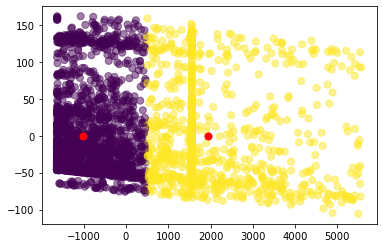

In [93]:
plt.scatter(pcadf["c1"], pcadf["c2"], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.show()

##### Posiblemente denota los cursos que pertencen a un grupo determinado

#### Cluster final con los nombres de las columnas

In [94]:
final_df = df.loc[ :, columns_to_use ]

In [95]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

##### Agregando una columna con las etiquetas de a que cluster pertenece

In [96]:
final_df["cluster"] = kmeans.labels_
final_df.cluster = final_df.cluster.astype(str)

In [97]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [98]:
fig = px.scatter(principalComponents, x=0, y=1, color=final_df["cluster"])

In [99]:
columns_to_use

['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

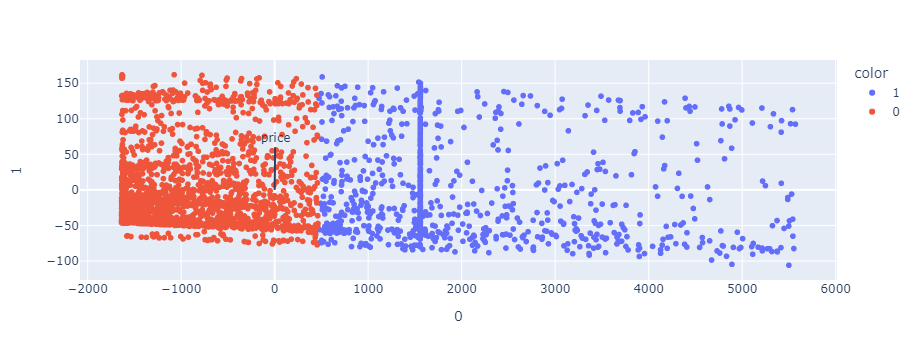

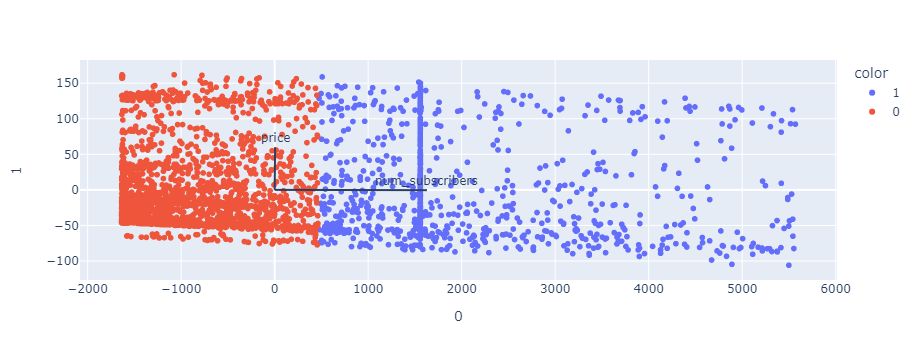

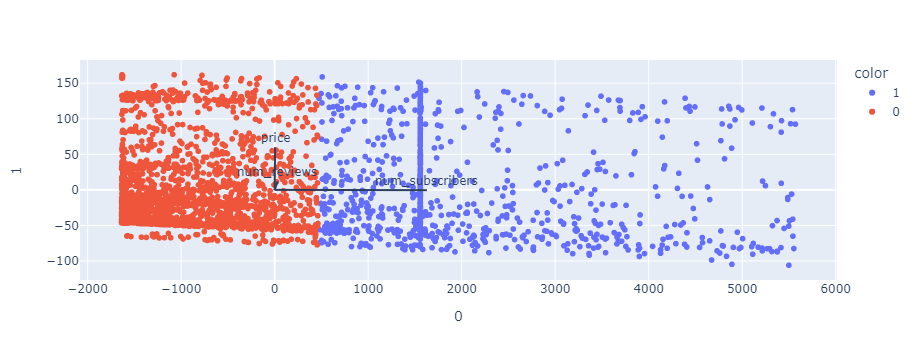

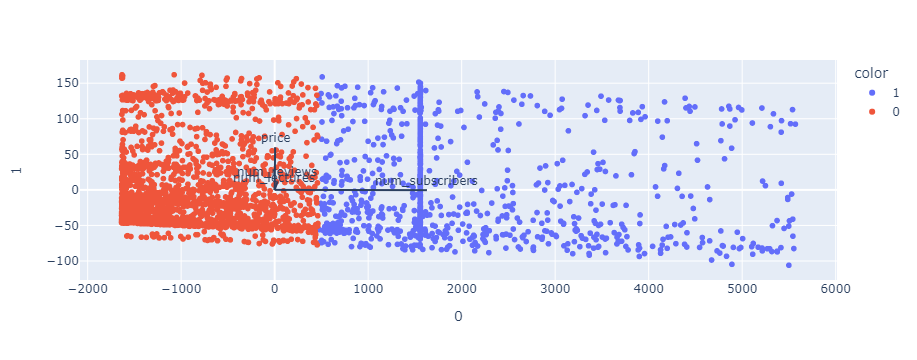

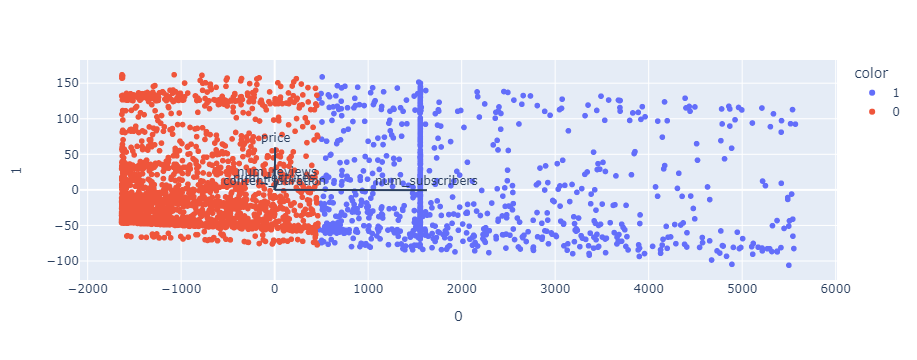

In [100]:
for i, feature in enumerate(columns_to_use):
    fig.add_shape(
        type="line",
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature
    )
    fig.show()

#### Con este grafico es mas facil sacar conclusiones de las correlaciones

In [101]:
final_df_cluster0 = final_df.loc[ final_df["cluster"] == "0", : ]
final_df_cluster1 = final_df.loc[ final_df["cluster"] == "1", : ]

In [102]:
final_df_cluster0.describe()

price  num_subscribers  num_reviews  num_lectures  \
count  2421.000000      2421.000000  2421.000000   2421.000000   
mean     63.895085       628.686906    34.453945     29.455597   
std      56.163572       612.354320    47.589273     14.821033   
min       0.000000         5.000000     1.000000      8.000000   
25%      20.000000        80.000000     5.000000     16.000000   
50%      45.000000       401.000000    13.000000     27.000000   
75%      85.000000      1094.000000    39.000000     40.000000   
max     200.000000      2104.000000   223.000000     71.000000   

       content_duration  
count       2421.000000  
mean           2.845464  
std            1.685549  
min            0.633333  
25%            1.500000  
50%            2.500000  
75%            4.094517  
max            7.500000

In [103]:
final_df_cluster1.describe()

price  num_subscribers  num_reviews  num_lectures  \
count  1257.000000      1257.000000  1257.000000   1257.000000   
mean     70.198886      3590.665871   104.618138     29.864757   
std      69.221675      1122.414145    62.326222     14.673436   
min       0.000000      2115.000000     1.000000      8.000000   
25%      20.000000      3197.000000    40.000000     17.000000   
50%      45.000000      3197.000000   138.000000     29.000000   
75%     100.000000      3782.000000   156.000000     40.000000   
max     200.000000      7211.000000   223.000000     71.000000   

       content_duration  
count       1257.000000  
mean           2.925469  
std            1.608410  
min            0.633333  
25%            1.500000  
50%            2.500000  
75%            4.094517  
max            7.500000

##### Se puenden comparar los dos grupos para hacer comparaciones entre las variables.
##### Una conlusion que se deberia sacar es que hay que enfocarse en una variable que afecta a las otras de un determinado grupo.
##### Que grupo de cursos anda bien y el otro no

### Machine Learning supervisado

#### Metodo de la regresion lineal

In [104]:
df.dtypes

course_id             int64
course_title         object
url                  object
is_paid                bool
price                 int64
num_subscribers       int64
num_reviews           int64
num_lectures          int64
level                object
content_duration    float64
subject              object
published_Month       int64
published_Year        int64
dtype: object

##### Definiendo la variable dependiente

###### Se desea trabajar el num_subscribers por num_reviews
###### En este caso se busca alta interpretabilidad por sobre la precision

In [151]:
y = df.loc[:, "num_reviews"].values
x = df.loc[:, ["num_subscribers"]].values

##### Segmentando en un dataset de entrenamiento y de testeo

In [152]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=0.2, random_state=0 )

In [153]:
len(x)

3678

In [154]:
len(X_Train)

2942

In [155]:
len(X_Test)

736

##### Objeto para correr la regresion lineal

In [156]:
regression = LinearRegression()

In [157]:
regression.fit(X_Train, Y_Train)

LinearRegression()

##### Los valores de X_Train andan cerce de los de Y_Train

In [158]:
regression.predict(X_Train)

array([ 26.67272062,  26.92993766,  26.59357691, ...,  26.57379099,
       143.58775917,  52.88907298])

In [159]:
Y_Train

array([  4,   1, 156, ..., 156,  35,  28], dtype=int64)

### Grafica para el entrenamiento

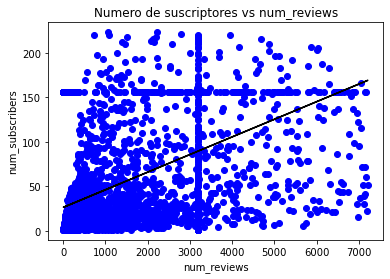

In [160]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = "blue")
viz_train.plot(X_Train, regression.predict(X_Train), color="black")
viz_train.title("Numero de suscriptores vs num_reviews")
viz_train.xlabel("num_reviews")
viz_train.ylabel("num_subscribers")
viz_train.show()

### Grafica para el Test

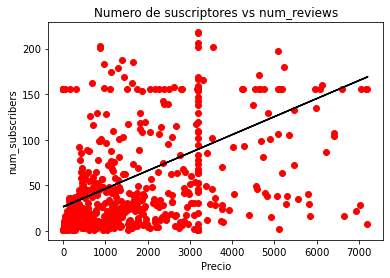

In [161]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = "red")
viz_train.plot(X_Train, regression.predict(X_Train), color="black")
viz_train.title("Numero de suscriptores vs num_reviews")
viz_train.xlabel("Precio")
viz_train.ylabel("num_subscribers")
viz_train.show()

#### Precision

In [162]:
regression.score(X_Test, Y_Test)

0.23949372710979255

### Multiples regresiones

### Regresión logística

In [117]:
df.is_paid = df.is_paid.astype(int)

In [118]:
columns_to_use = ['price','num_subscribers', 
                 'num_reviews', 'num_lectures',
                 'content_duration']

In [119]:
x = df[columns_to_use].values

In [120]:
y = df["is_paid"].values

In [142]:
X_Train, X_test, Y_Train, Y_test = train_test_split( x, y, test_size=0.2, random_state=1 )

In [143]:
log_model = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)
log_model.fit(X_Train, Y_Train )

LogisticRegression(max_iter=1000)

In [144]:
y_pred = log_model.predict(X_test)

In [145]:
cnf_matrix = metrics.confusion_matrix(Y_test , y_pred)

In [146]:
cnf_matrix

array([[ 41,   0],
       [  0, 695]], dtype=int64)

class_names = [0,1]
fix, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks , class_names)
plt.yticks(tick_marks , class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fst = 'g'
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion")
plt.ylabel("Etiqueta actual")
plt.xlabel("Etiqueta de prediccion")

In [150]:
metrics.accuracy_score(Y_test , y_pred)

1.0

In [148]:
metrics.precision_score(Y_test , y_pred)

1.0